# CREDIT CARD FRAUD DETECTION

## Group Members:
1. **Malvis Kagiri - Scrum Master**
2. **Maryann Maina**
3. **Flavian Miano**
4. **Keith Madegwa**
5. **Patience Anono**
6. **Wema Mothoni**


## 1.INTRODUCTION  

Credit card fraud is defined as a fraudulent transaction (payment) that is made using a credit or debit card by an unauthorized user.Credit cards are now the most preferred way for customers to transact either offline or online, due to the advancement in communication and electronic commerce systems.

## 2.BUSINESS UNDERSTANDING  

Fraud associated with  transactions has increased significantly and fraud detection has become a challenging task because of the constantly changing nature and patterns of the fraudulent transactions.This has sparked the proliferation and increase in the use of services such as e-commerce, tap and pay systems, online bills payment systems etc. As a consequence, fraudsters have also increased activities to attack transactions that are made using credit cards.It is therefore crucial to implement effective and efficient mechanisms that can detect credit card fraud to protect users from financial loss.


### 2.1.Problem statement  

Due to the increase in fraudulent activities it  has become essential for financial institutions and businesses to develop advanced fraud detection techniques to counter the threat of fraudulent credit card transactions and identity theft and keep losses to a minimum

### 2.2.Aim  

To develop an accurate and reliable machine learning model that can detect fraudulent activities in real-time

### 2.3.Objectives  
-To contribute to the development of more accurate and effective fraud detection models for financial transactions.  
-To provide a useful tool for individuals and organizations to detect and prevent fraudulent financial transactions, thereby minimizing financial losses and improving financial security.  
-To compare different ML models predictions to achieve highest accuracy.  
-Advice the Company on best the strategy.

## 3.DATA UNDERSTANDING  

The dataset used for this project was acquired from [Kaggle] . This dataset contains financial transactions that have been simulated using a real-world financial transactions dataset and it has 23 columns and rows. The target variable(is fraud) which is a binary indicator shows that whether the transaction is fraudulent 1 or not 0.We  performed an exploratory data analysis to the training data to understand which features  were correlated to fraudulent activities and then attempted to create models with those features and test out their predicitve effectiveness.The dataset contained the folowing features.

Index - Unique Identifier for each row
Trans_date_trans_time - Transaction DateTime
Cc_num - Credit Card Number of Customer
Merchant - Merchant Name
Category - Category of Merchant
Amt - Amount of Transaction
First - First Name of Credit Card Holder
Last - Last Name of Credit Card Holder
Gender - Gender of Credit Card Holder
Street - Street Address of Credit Card Holder
City - City of Credit Card Holder
State - State of Credit Card Holder
Zip - Zip of Credit Card Holder
Lat - Latitude Location of Credit Card Holder
Long - Longitude Location of Credit Card Holder
City_pop - Credit Card Holder's City Population
Job -Job of Credit Card Holder
Dob - Date of Birth of Credit Card Holder
Rans_num - Transaction Number
Unix_time - UNIX Time of transaction
Merch_lat - Latitude Location of Merchant
Merch_long - Longitude Location of Merchant
Is_fraud  - Fraud Flag <--- Target Class


Index                                                          Unique Identifier for each row 

Trans_date_trans_time                          Transaction DateTime 


### 3.1 METRIC OF SUCCESS  

The success of the project will be measured by the accuracy, precision, recall, and F1-score of the developed machine learning model. The model should have a high accuracy in classifying fraudulent transactions, minimize false positives, and minimize false negatives.

## 5.REQUIREMENTS

1. Data collection from Kaggle dataset.
2. Data preprocessing and feature engineering.
3. Exploratory data analysis to gain insights into the dataset.
4. Model selection and training, including logistic regression, decision trees, and random forests.
5. Model evaluation and fine-tuning of the best-performing model.
6. Comparison of the final model with other models developed in the project.

## 6. Reading the Data

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data from the source 
credits_df = pd.read_csv('fraudTrain.csv')
credits_test_df = pd.read_csv('fraudTest.csv')
pd.set_option('display.max_columns', None)



## 7. Checking the Data

In [3]:
#previewing the top of the dataset
credits_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Previewing the bottom of our train dataset
credits_df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [5]:
# Previewing the top of our test dataset
credits_test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
# Previewing the bottom of our test dataset
credits_test_df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [7]:
#Checking no.of records in the train dataset
print(f'The train set has {credits_df.shape} rows and columns')

The train set has (1296675, 23) rows and columns


In [8]:
#Checking the shape of the test dataset
print(f'The test set has {credits_test_df.shape} rows and columns')

The test set has (555719, 23) rows and columns


In [9]:
# Checking whether each column has an appropriate datatype in the train dataset
credits_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [10]:
# Checking whether each column has an appropriate datatype in the test dataset
credits_test_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [11]:
# Checking the info in the train dataset
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [12]:
# Describing the data
credits_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [13]:
# Checking the info in the test dataset
credits_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [14]:
# Describing the data for the test dataset
credits_test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [15]:
# Value counts for each column in train dataset
for col in credits_df.columns[1:]:
    print('\n' + col + '\n')
    print(credits_df[col].value_counts())


trans_date_trans_time

2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64

cc_num

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

merchant

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
frau

In [16]:
# Value counts for each column in test dataset
for col in credits_test_df.columns[1:]:
    print('\n' + col + '\n')
    print(credits_test_df[col].value_counts())


trans_date_trans_time

2020-12-19 16:02:22    4
2020-12-13 17:53:47    4
2020-12-17 20:36:39    4
2020-10-05 19:37:49    4
2020-12-27 01:22:37    3
                      ..
2020-08-25 13:15:57    1
2020-08-25 13:15:37    1
2020-08-25 13:15:22    1
2020-08-25 13:15:12    1
2020-12-31 23:59:34    1
Name: trans_date_trans_time, Length: 544760, dtype: int64

cc_num

6538441737335434       1474
4586810168620942       1466
4745996322265          1462
4587657402165341815    1458
2242542703101233       1428
                       ... 
4883407061576             9
4087542780207162          9
3540416671210051          8
4352307151555405069       7
4295296907373             6
Name: cc_num, Length: 924, dtype: int64

merchant

fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 

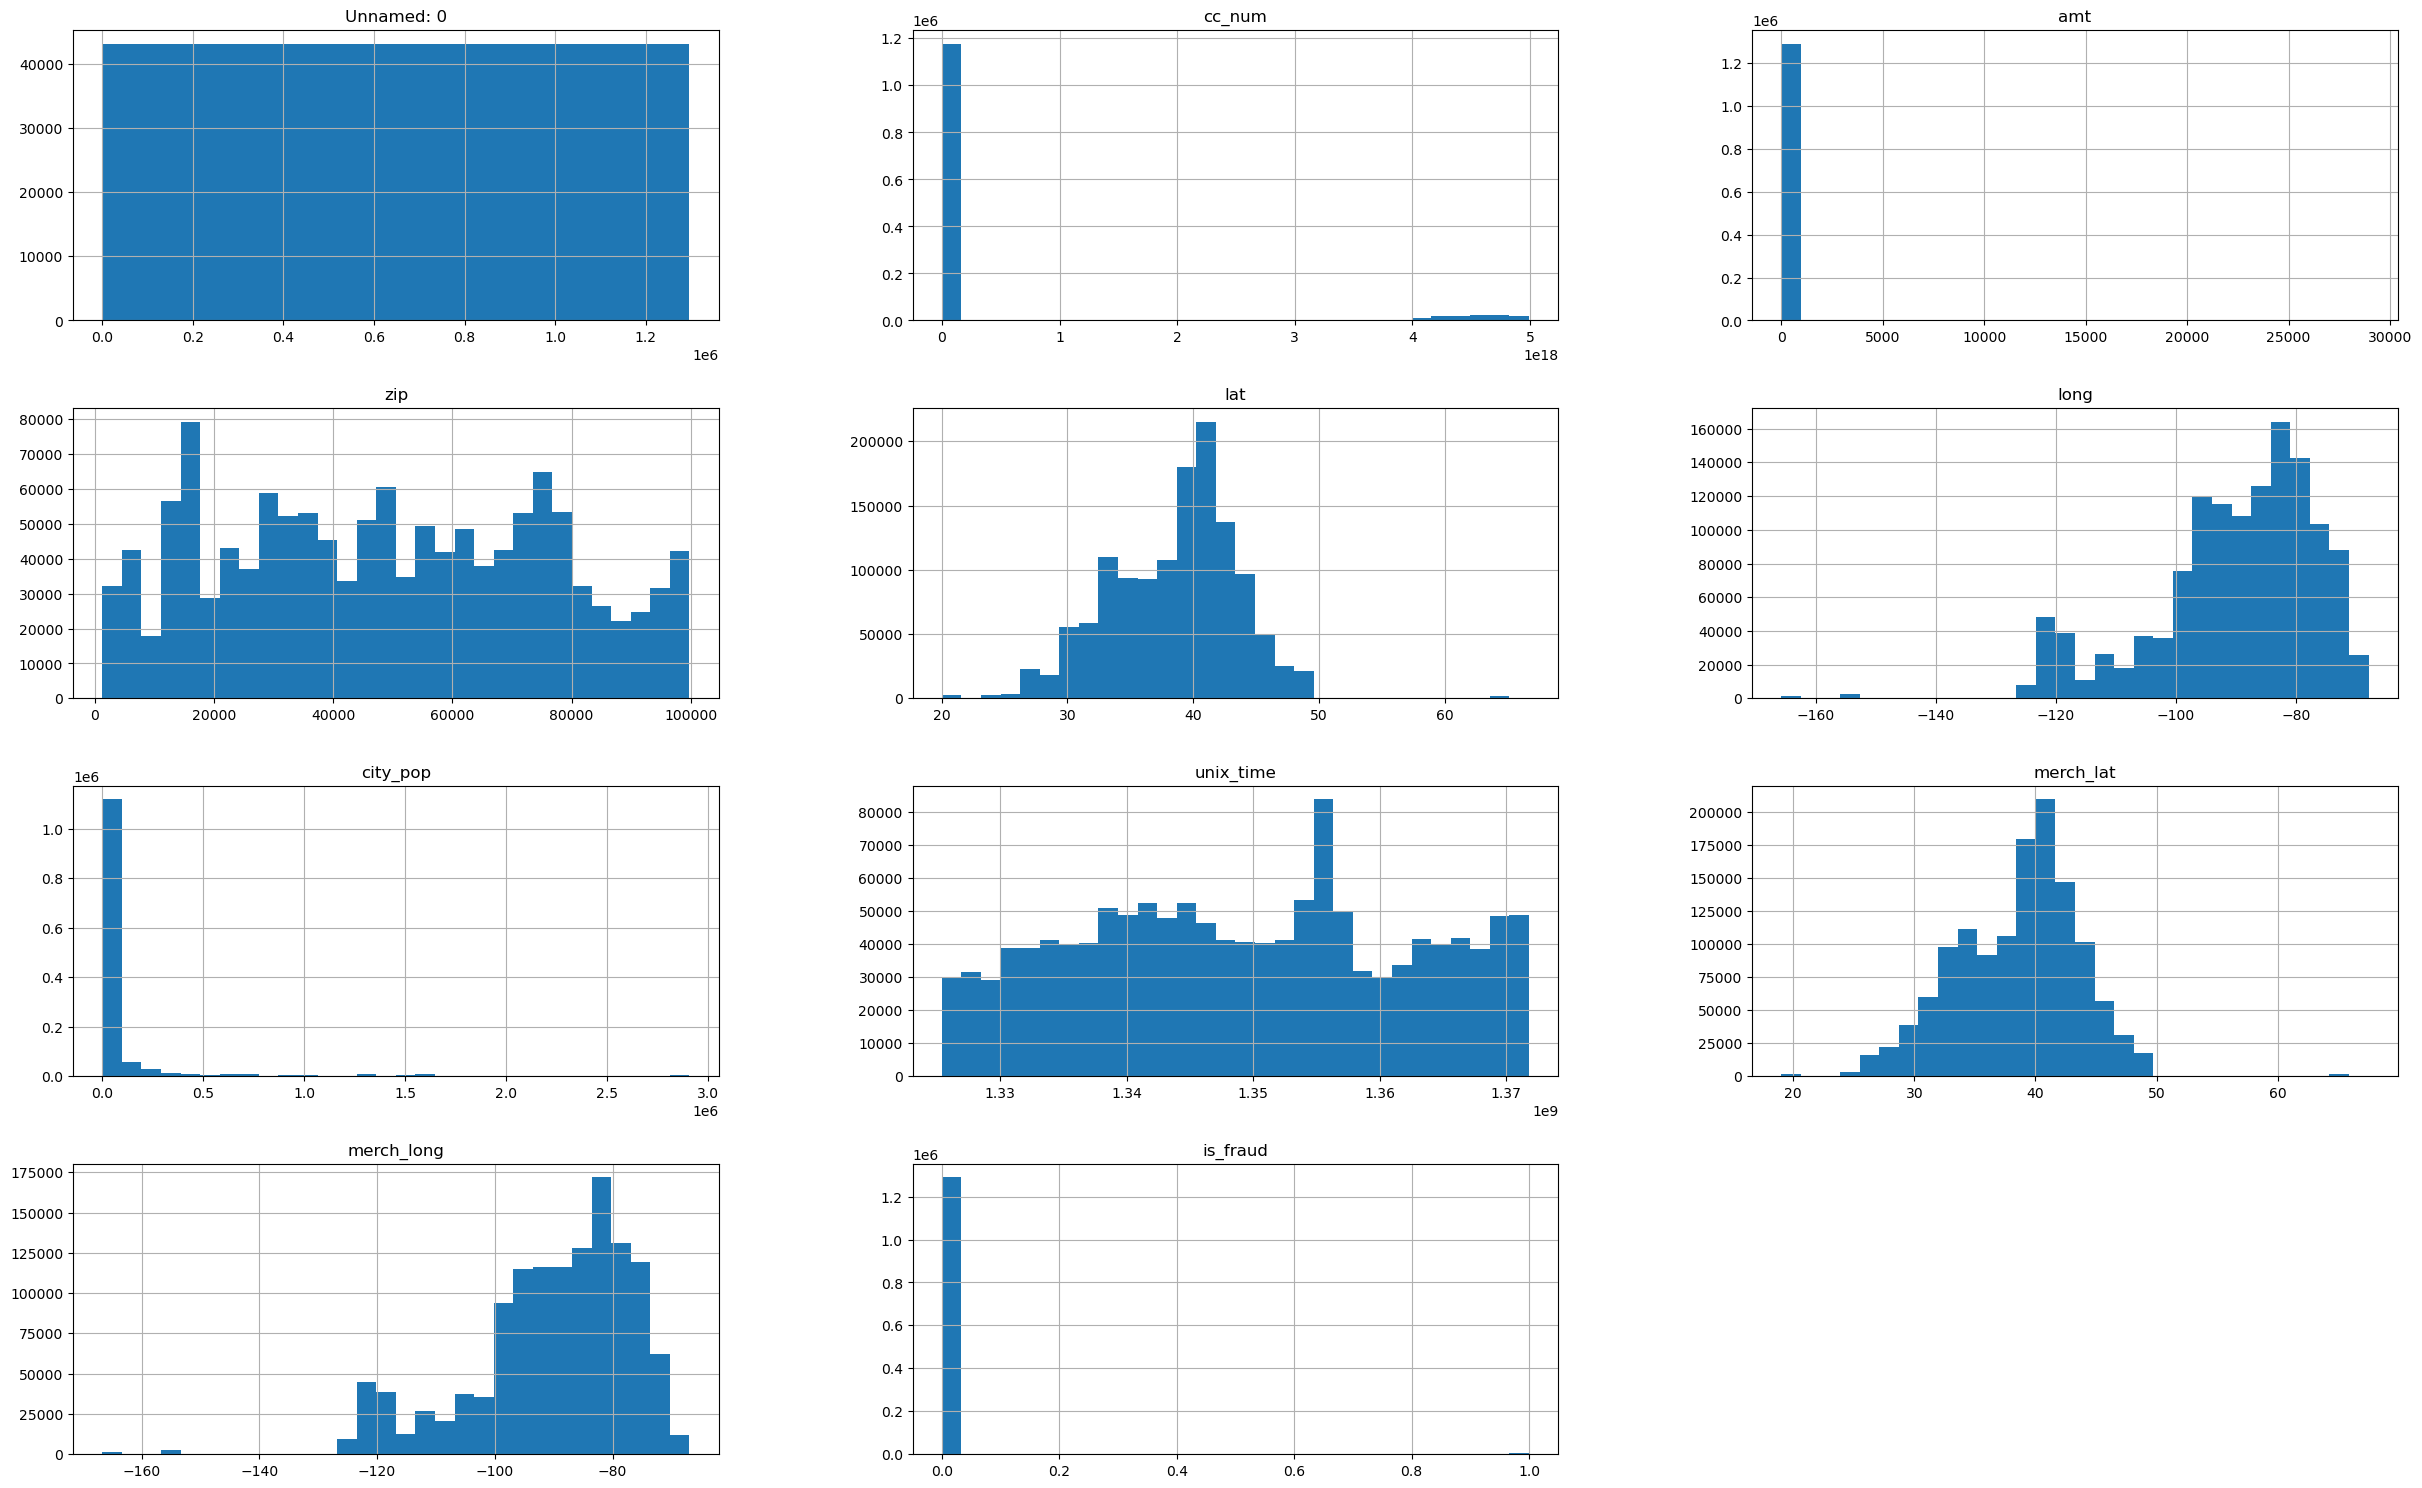

In [17]:
credits_df.hist(bins=30, figsize=(30, 18.5))
plt.show()

We note that the histograms for most of the variables look quite symmetrical around the mean, and therefore will not require feature transformation to make them more symmetrical.



## 8. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 9. Tidying the Dataset

In [18]:
# Identifying the Missing Data
credits_test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [19]:
# Identifying the Missing Data
credits_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [20]:
#Checking for duplicates in the train dataset
credits_df.duplicated().sum()

0

In [21]:
# Checking for duplicates
credits_test_df.duplicated().sum()

0

There were no duplicates nor missing values in both the train and test datasets.

In [22]:
# Dropping the unnamed column
credits_df.drop(credits_df.columns[0], axis=1, inplace=True)
credits_test_df.drop(credits_test_df.columns[0], axis=1, inplace=True)

In [23]:
# Converting date columns to datetime format

credits_df['trans_date_trans_time']=pd.to_datetime(credits_df['trans_date_trans_time'])
credits_df['trans_date']=credits_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credits_df['trans_date']=pd.to_datetime(credits_df['trans_date'])
credits_df['dob']=pd.to_datetime(credits_df['dob'])

credits_test_df['trans_date_trans_time']=pd.to_datetime(credits_test_df['trans_date_trans_time'])
credits_test_df['trans_date']=credits_test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credits_test_df['trans_date']=pd.to_datetime(credits_test_df['trans_date'])
credits_test_df['dob']=pd.to_datetime(credits_test_df['dob'])

In [24]:
# Separate date and time components into separate columns
credits_df['trans_time'] = credits_df['trans_date_trans_time'].dt.time
credits_test_df['trans_time'] = credits_test_df['trans_date_trans_time'].dt.time
credits_df['hour'] = credits_df['trans_date_trans_time'].dt.hour
credits_test_df['hour'] = credits_test_df['trans_date_trans_time'].dt.hour

In [25]:
#dropping the trans_date_trans_time column
credits_df = credits_df.drop(columns='trans_date_trans_time')
credits_test_df = credits_test_df.drop(columns='trans_date_trans_time')

## 10. Exploratory Analysis  
In trying to understand our data better, let's check for the distribution of the individual features in our dataset.
Answer a few questions:

- What is the distribution of Fraud transactions?
- What are statistical measures in the amount column for both fraud and legit transactions?
- What is the total percentage of fraud transactions?  
- What are the general trends of amounts for Credit Card Fraud Transactions?
- What is the relationship between  transaction and the other attributes?
- Find out what attributes have the highest correlation with Fraud Transactions.

In [26]:
credit_df = credits_df.copy()

### 10.1 Distribution of Transactions

<Axes: xlabel='is_fraud', ylabel='count'>

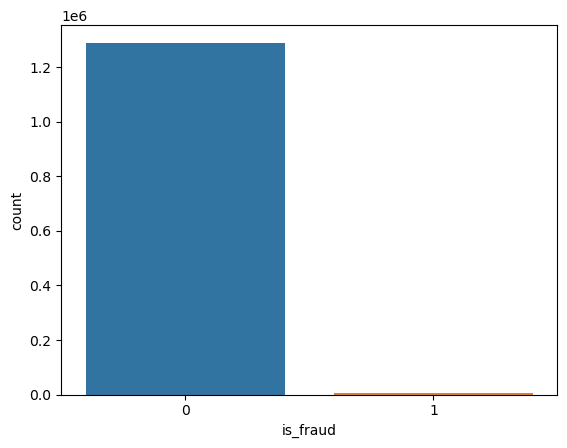

In [27]:
#checking the distribution of the churn (target) variable using a box plot
sns.countplot(x = "is_fraud",data =credit_df)

This Dataset is highly imbalanced as evident from the countplot with majority class label '0' and minority class label '1'  
0: Legitimate Transactions
1: Fraud Transactions

In [28]:
percentage_Fraud = 100 * credit_df[credit_df.is_fraud == 1].shape[0]/credit_df[credit_df.is_fraud == 0].shape[0]
print('The percentage of fraudulent transactions is : %.2f percent' % percentage_Fraud )

The percentage of fraudulent transactions is : 0.58 percent


### 10.2 The statistical measures in the amount column for both fraud and legit transactions.

In [29]:
#separating the data for analysis
legit = credit_df[credit_df.is_fraud == 0]
fraud = credit_df[credit_df.is_fraud == 1]

In [30]:
print(legit.shape)
print(fraud.shape)

(1289169, 24)
(7506, 24)


In [31]:
legit.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [32]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

The mean /average amount for fraudlent transaction is 531 which is more compared to the legit transaction. For all the fraudulent activities, the mean transction is quite bigger than that of legit activities.

#### 10.2.1 Comparison values of all attributes  for both legit and fraudulent transactions

In [33]:
credit_df.groupby('is_fraud').mean()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,hour
is_fraud,,,,,,,,,,
0,4.172901e+17,67.667110,48805.107481,38.536888,-90.228142,88775.228137,1.349249e+09,38.536659,-90.228274,12.797679
1,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,97276.763256,1.348389e+09,38.653901,-89.915808,14.037836


### 10.3 Total percentage of both fraudulent and legit transactions

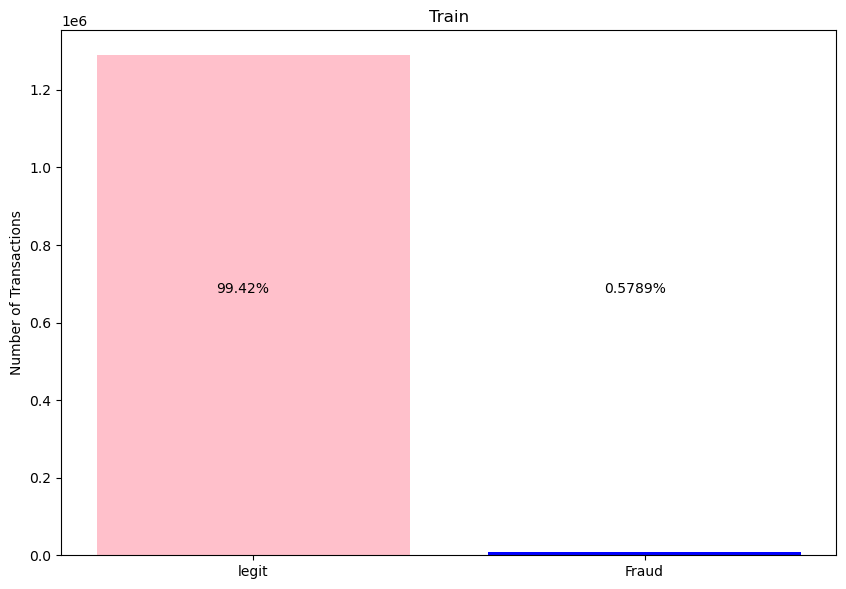

In [34]:
classes_train=credit_df['is_fraud'].value_counts()
normal_share_train=classes_train[0]/credit_df['is_fraud'].count()*100
fraud_share_train=classes_train[1]/credit_df['is_fraud'].count()*100

fig = plt.figure(figsize =(10, 15))
plt.subplot(2,1,1)
plt.bar(['legit','Fraud'], classes_train, color=['pink','blue'])
plt.title('Train')
plt.ylabel('Number of Transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')
plt.show()

The percentage for the normal is higher that the fraudulent transactions.

### 10.4. Which  gender transacts most using credit card

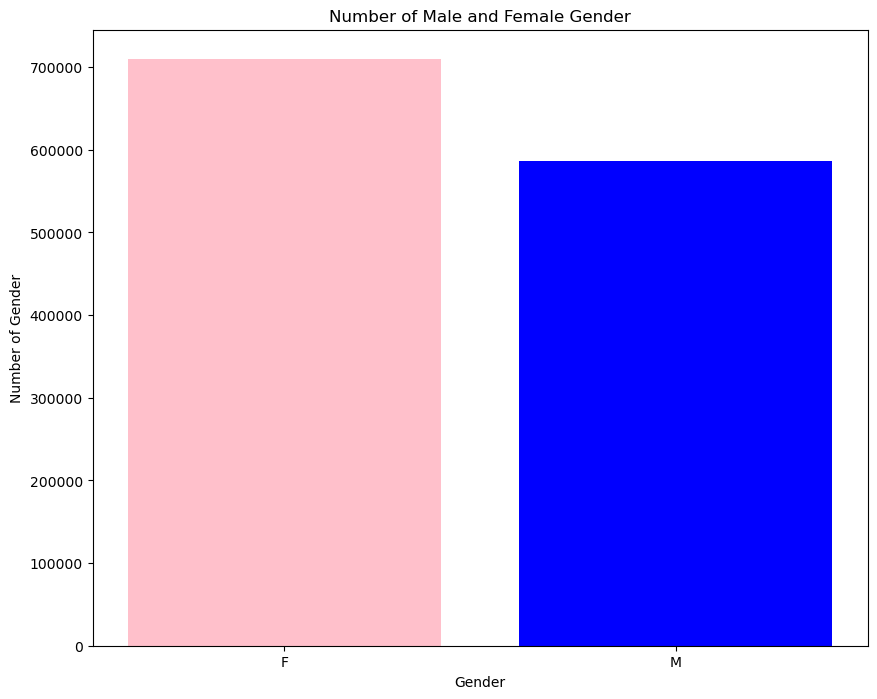

In [35]:
# Count the number of male and female gender
gender_count = credit_df['gender'].value_counts()

# Create a bar chart showing the number of male and female gender
fig = plt.figure(figsize =(10, 8))
plt.bar(gender_count.index, gender_count.values, color = ["pink","blue"])
plt.title('Number of Male and Female Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Gender')
plt.show()


### 10.5 Gender Vs Fraud  
Which gender is more susceptible to fraud than the other.

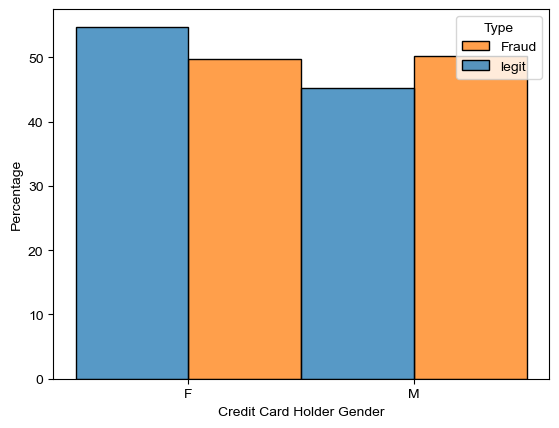

In [36]:
ax=sns.histplot(x='gender',data=credit_df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'legit'])
sns.set(rc={"figure.figsize":(10, 8)}) #width=10, #height=8

In this case, there is no clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.

In [37]:
fraud_df = credit_df[credit_df['is_fraud'] == 1]

In [38]:
fraud_df['gender'].value_counts()

M    3771
F    3735
Name: gender, dtype: int64

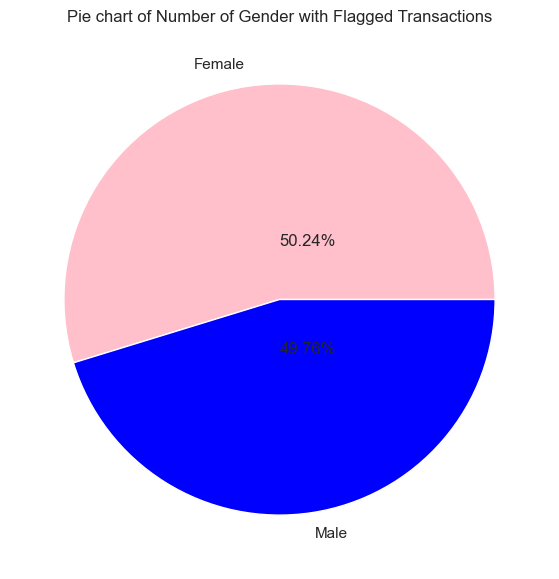

In [39]:
classes_train=fraud_df['gender'].value_counts()
female_share_train=classes_train[0]/fraud_df['gender'].count()*100
male_share_train=classes_train[1]/fraud_df['gender'].count()*100

# Creating plot
colors = ['pink', 'blue']
labels = ['Female', 'Male']
fig = plt.figure(figsize =(10, 7))
plt.pie(credit_df['gender'].value_counts(), labels=labels, colors=colors)
plt.annotate("{0:.4}%".format(female_share_train),(0.5, 0.6), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(male_share_train),(0.5, 0.4), xycoords='axes fraction')
plt.title('Pie chart of Number of Gender with Flagged Transactions')
 
# show plot
plt.show()

### 10.6. Jobs and frequency of transactions

In [40]:
# Count of the jobs
credit_df['job'].value_counts().to_frame()

,job
Film/video editor,9779
Exhibition designer,9199
Naval architect,8684
"Surveyor, land/geomatics",8680
Materials engineer,8270
...,...
Information officer,8
Veterinary surgeon,8
Ship broker,7
Contracting civil engineer,7


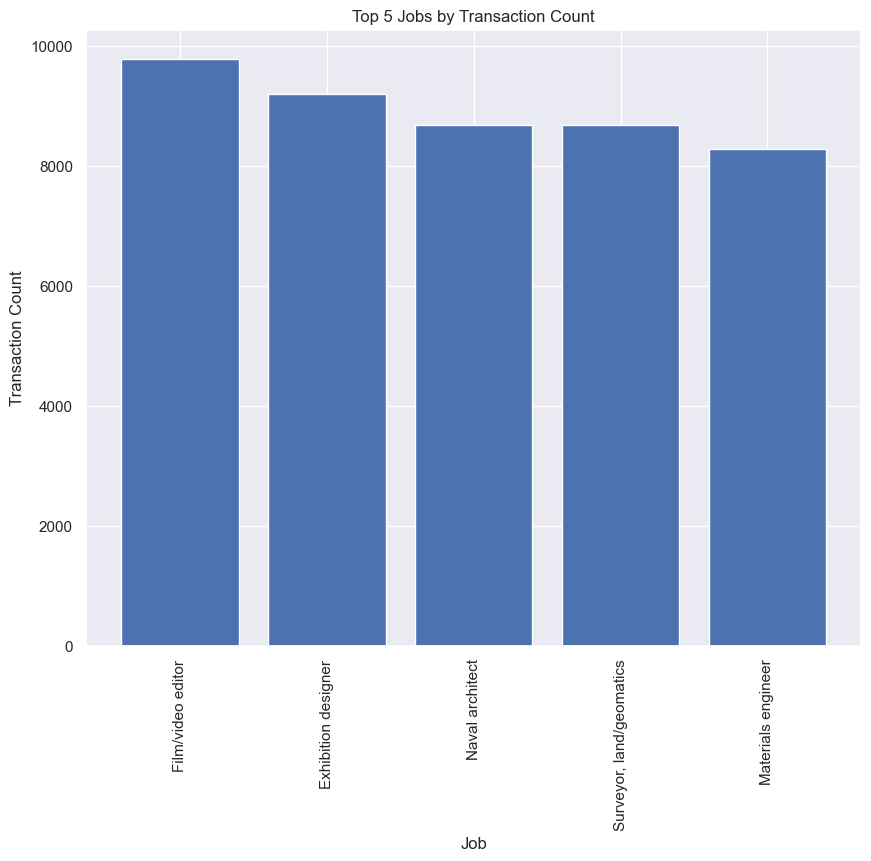

In [41]:
#Visualizing the job and transactions
# Get the top 5 jobs by transaction count
top_jobs = credit_df['job'].value_counts().nlargest(5)

# Create a bar chart of the top 10 jobs
plt.figure(figsize=(10, 8))
plt.bar(top_jobs.index, top_jobs.values, color= "b")
plt.title('Top 5 Jobs by Transaction Count')
plt.xlabel('Job')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.show()


Film/Video editors do the most transactions using credit card

### 10.7.Job title vs transaction amount

In [42]:
# Grouping with the jobs column
job_df = credit_df.groupby(['job']).mean()
job_df = job_df.sort_values(by='amt', ascending=False)

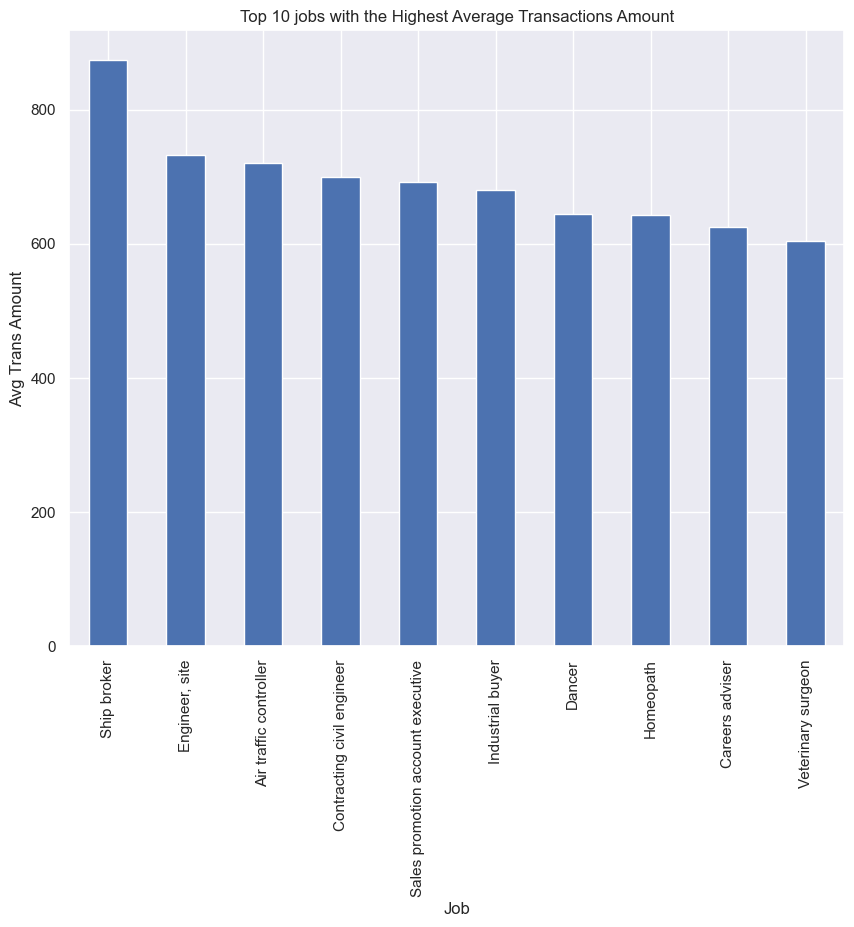

In [43]:
job_df['amt'][:10].plot(kind='bar', title='Top 10 jobs with the Highest Average Transactions Amount', \
                                xlabel='Job', color = 'b', ylabel='Avg Trans Amount');

When it comes to transaction amount,ship broker is the leading in the transacted amount.

### 10.8.Card holders vs street.

In [44]:
# Number of card holders per street
credit_df['street'].value_counts()[:10].to_frame()

,street
0069 Robin Brooks Apt. 695,3123
864 Reynolds Plains,3123
8172 Robertson Parkways Suite 072,3119
4664 Sanchez Common Suite 930,3117
8030 Beck Motorway,3113
29606 Martinez Views Suite 653,3112
1652 James Mews,3110
854 Walker Dale Suite 488,3107
40624 Rebecca Spurs,3106
594 Berry Lights Apt. 392,3101


### 10.9.Transaction amount vs Fraud

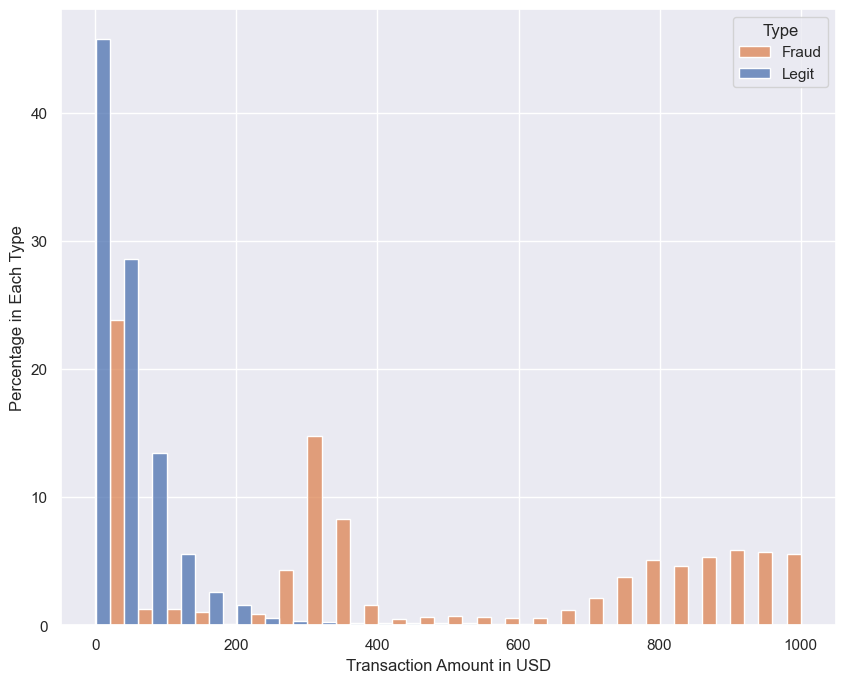

In [45]:
#amount vs fraud
ax=sns.histplot(x='amt',data=credit_df[credit_df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Legit'])

Normal transactions tend to be around $300 and below.Fraudulent transactions peak around $300 and then at the $800-$1000 range. There is a very clear pattern.

### 10.10. State Vs Fraud

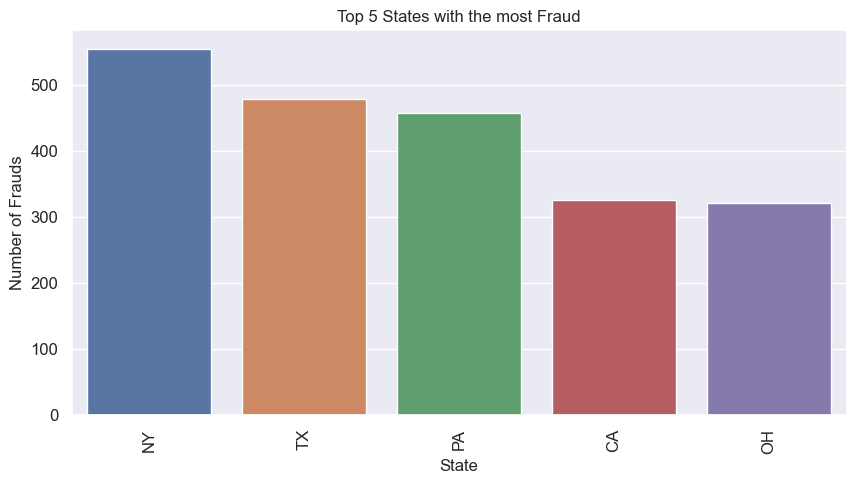

In [46]:
# Create a stacked bar chart to visualize the distribution of fraudulent and non-fraudulent transactions in each state
f, ax = plt.subplots(figsize=(10,5))
#colors = ['green', 'blue']  # blue and green
sns.countplot(x='state', data=fraud, \
              ax=ax, order=fraud['state'].value_counts().iloc[:5].index)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('State')
plt.ylabel('Number of Frauds')
plt.title('Top 5 States with the most Fraud')
plt.show();


NY, WI and PA among others have a higher percentage of fraudulent transactions than normal ones, while DE and HI are the opposite. However, it should be pointed out that the percentage differences in those states are not very significant but a correlation does exist.

### 10.11. Street vs Fraud

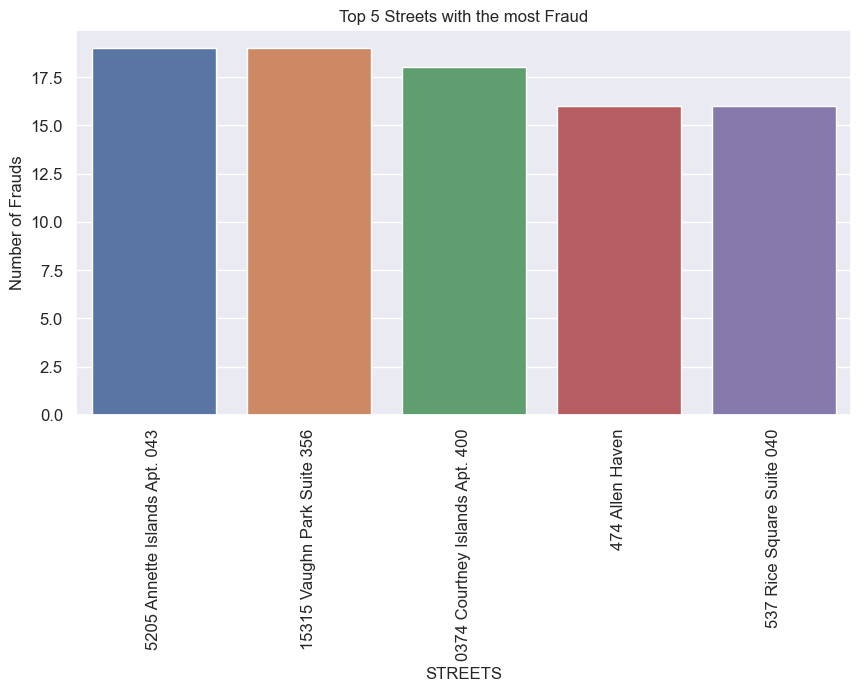

In [47]:
# Create a stacked bar chart to visualize the distribution of fraudulent and non-fraudulent transactions in each street
f, ax = plt.subplots(figsize=(10,5))
#colors = ['green', 'blue']  # blue and green
sns.countplot(x='street', data=fraud, \
              ax=ax, order=fraud['street'].value_counts().iloc[:5].index)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('STREETS')
plt.ylabel('Number of Frauds')
plt.title('Top 5 Streets with the most Fraud')
plt.show();

In [48]:
credit_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'hour'],
      dtype='object')

### 10.12. Ages Vs Fraud
Which age group are more prone to credit card fraud?  Given the birthday info, we can calculate the age of each card owner (in 2023) and see whether a trend exists.

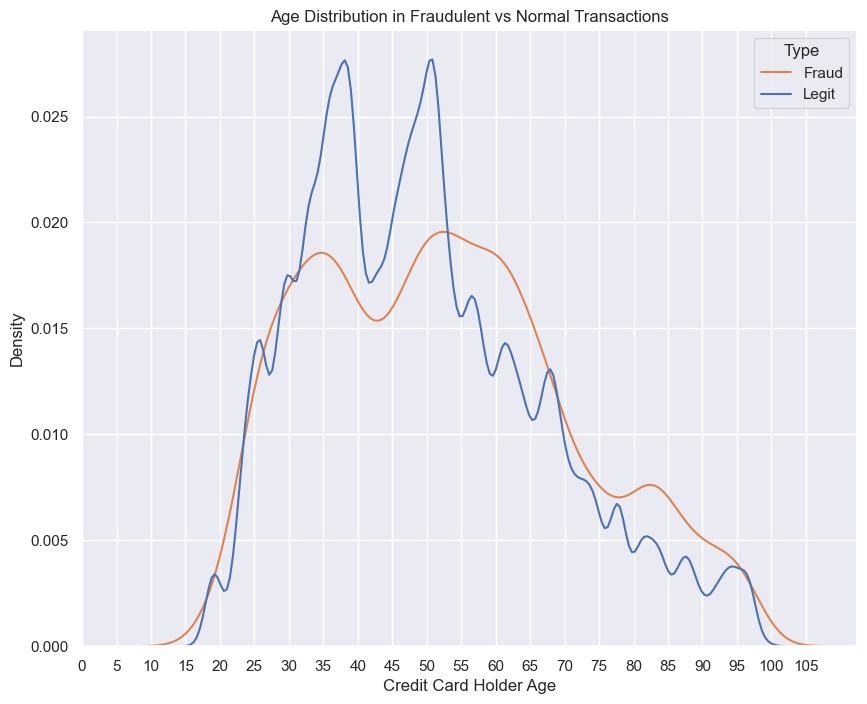

In [49]:
#age vs fraud
credit_df['age']=dt.date.today().year-pd.to_datetime(credit_df['dob']).dt.year
ax=sns.kdeplot(x='age',data=credit_df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Normal Transactions')
plt.legend(title='Type', labels=['Fraud', 'Legit'])

The age distribution actually very different between the normal and fraudulent transaction. In normal transactions, there are 2 peaks at the age of 35-40 and 50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-60.

### 10.13. Spending Category vs Fraud

In [50]:
credit_df['category'].value_counts().to_frame()

,category
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758
health_fitness,85879


Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

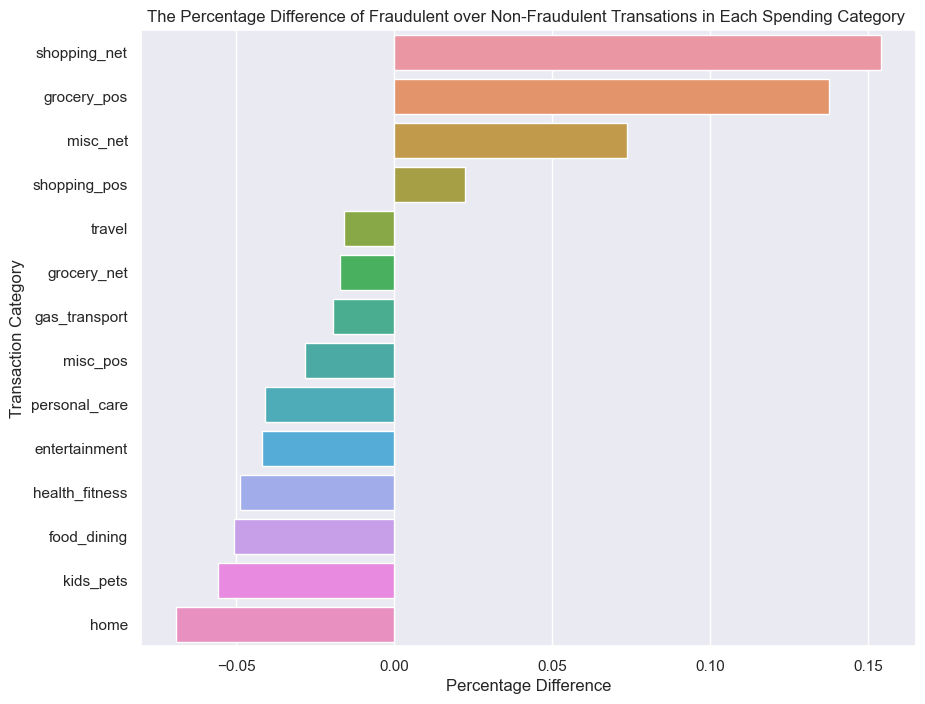

In [51]:
#calculate the percentage difference
a=credit_df[credit_df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=credit_df[credit_df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Some  categories  see more fraud than others. Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

### 10.14.Time Vs Fraud  
What time does the Credit Card Frauds usually take place?

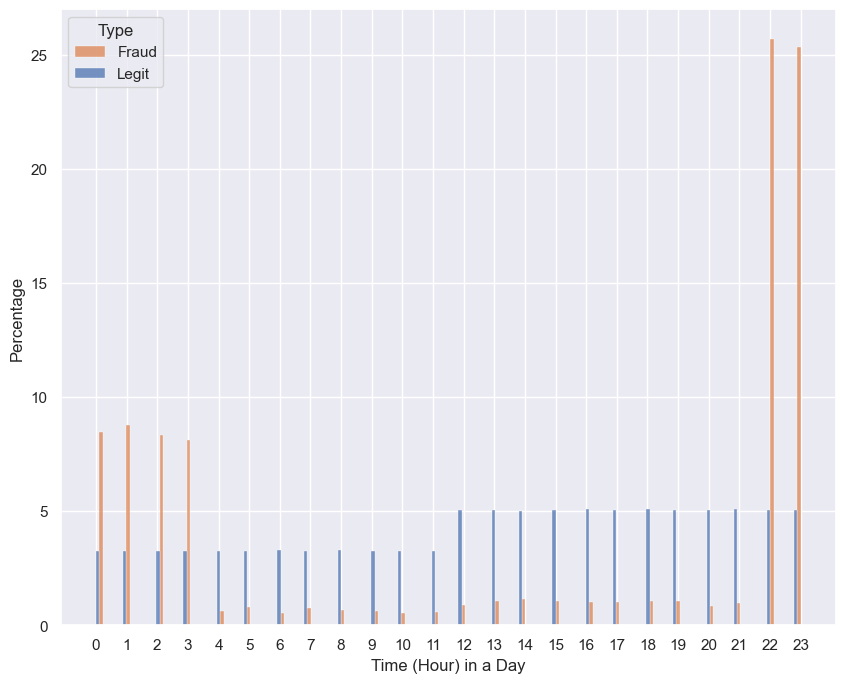

In [52]:
#time in a day vs fraud
ax=sns.histplot(data=credit_df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Legit'])

Most fraudulent activities occur from 10pm,and this is when most people are asleep.

## 11. PREPROCESSING

Based on our EDA above, we found out that some of the features including transaction amout, credit card holder age, spending category, transaction time and locations all had varying degrees of correlations with credit card fraud.We did feature engineering to choose the features  to include in our data models. We did train the models on the training data set which we analyzed above and then used the testing dataset to evaluate the model's performance.

As data models need numeric input, we converted some of the categorical columns into numeric.

In [53]:
# Define a dictionary of column name mappings
col_names = {
    'cc_num': 'Credit Card Number',
    'merchant': 'Merchant Name',
    'category': 'Merchant Category',
    'amt': 'Transaction Amount',
    'first': 'First Name',
    'last': 'Last Name',
    'gender': 'Gender',
    'street': 'Street Address',
    'city': 'City',
    'state': 'State',
    'zip': 'Zip Code',
    'lat': 'Latitude',
    'long': 'Longitude',
    'city_pop': 'City Population',
    'job': 'Occupation',
    'dob': 'Date of Birth',
    'trans_num': 'Transaction Number',
    'unix_time': 'UNIX Time',
    'merch_lat': 'Merchant Latitude',
    'merch_long': 'Merchant Longitude',
   'trans_date': 'Date',
    'trans_time': 'Time',
    'hour': 'Hour',
    'age': 'Age',
     'is_fraud': 'Is Fraud',
}

# Rename the columns using the dictionary of mappings
credit_train_df = credits_df.rename(columns=col_names)
credit_test_df = credits_test_df.rename(columns=col_names)

In [54]:
# convert datetime columns to int
for col in credit_train_df.select_dtypes(include=['datetime64[ns]']):
    credit_train_df[col] = credit_train_df[col].astype('int64')


In [55]:
#make copies of the dataframe
train = credit_train_df.copy()

In [56]:
test = credit_test_df.copy()

In [57]:
# Concatenate the two dataframes for each class along ROWS - i.e. on top of each other, hence the use of axis = 0
# new dataframe called model_df
#model_df = pd.concat([train, test], ignore_index = True)

### Feature Correlations.
Checking for features that have high correlation with the target(Is Fraud) variable 

In [58]:
corr_Fraud = credit_train_df.corr()['Is Fraud']
print(corr_Fraud)

Credit Card Number   -0.000981
Transaction Amount    0.219404
Zip Code             -0.002162
Latitude              0.001894
Longitude             0.001721
City Population       0.002136
Date of Birth        -0.012391
UNIX Time            -0.005078
Merchant Latitude     0.001741
Merchant Longitude    0.001721
Is Fraud              1.000000
Date                 -0.005067
Hour                  0.013799
Name: Is Fraud, dtype: float64


In [59]:
corr_Fraud = corr_Fraud[:-1].abs().sort_values(ascending = False)
corr_Fraud

Is Fraud              1.000000
Transaction Amount    0.219404
Date of Birth         0.012391
UNIX Time             0.005078
Date                  0.005067
Zip Code              0.002162
City Population       0.002136
Latitude              0.001894
Merchant Latitude     0.001741
Merchant Longitude    0.001721
Longitude             0.001721
Credit Card Number    0.000981
Name: Is Fraud, dtype: float64

### Train Test Split

In [62]:
#splitting the data into dependent(x) and independent variables(y)
y = credit_train_df['Is Fraud']
credit_train_df = credit_train_df.drop('Is Fraud',axis = 1)

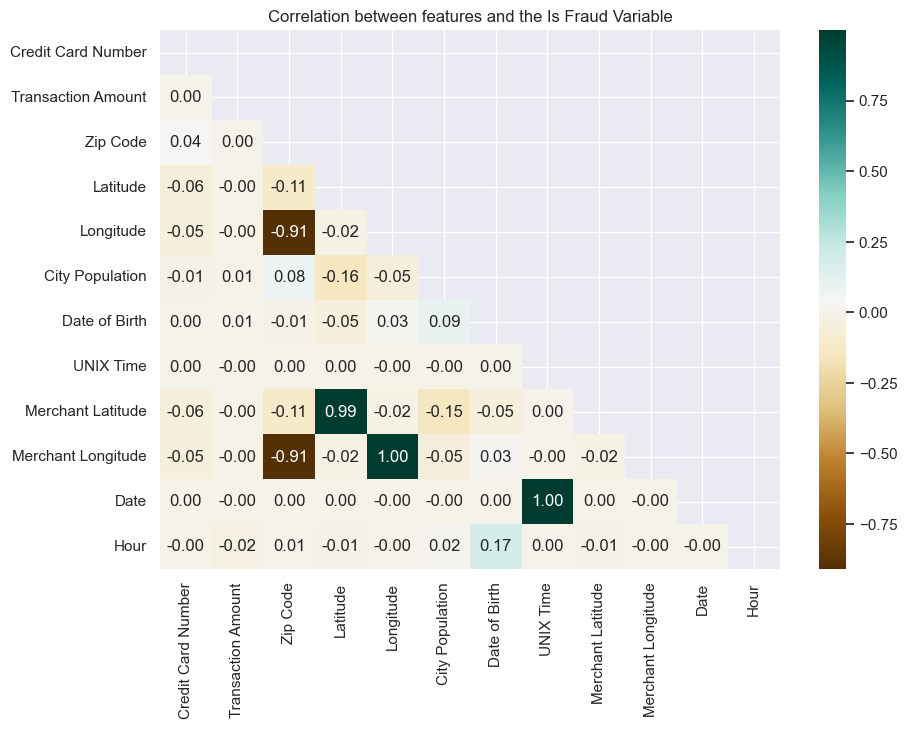

In [63]:
corr = credit_train_df.corr()
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(credit_train_df.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between features and the Is Fraud Variable')
plt.show()

The dark blue  colors represent high correlations.

In [64]:
credit_train_df.dtypes

Credit Card Number      int64
Merchant Name          object
Merchant Category      object
Transaction Amount    float64
First Name             object
Last Name              object
Gender                 object
Street Address         object
City                   object
State                  object
Zip Code                int64
Latitude              float64
Longitude             float64
City Population         int64
Occupation             object
Date of Birth           int64
Transaction Number     object
UNIX Time               int64
Merchant Latitude     float64
Merchant Longitude    float64
Date                    int64
Time                   object
Hour                    int64
dtype: object

### Categorical and numerical Variable Treatment
Categorical columns will need to be OneHotEncoded and the numerical columns will need to be put through a StandardScaler so all values are on the same scale.

In [65]:
credit_train_df.columns

Index(['Credit Card Number', 'Merchant Name', 'Merchant Category',
       'Transaction Amount', 'First Name', 'Last Name', 'Gender',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'City Population', 'Occupation', 'Date of Birth', 'Transaction Number',
       'UNIX Time', 'Merchant Latitude', 'Merchant Longitude', 'Date', 'Time',
       'Hour'],
      dtype='object')

In [66]:
#creating a variable to store categorical columns
categ= credit_train_df.select_dtypes(include=["object"])
categ.head(3)

,Merchant Name,Merchant Category,First Name,Last Name,Gender,Street Address,City,State,Occupation,Transaction Number,Time
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,00:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,00:00:44
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,00:00:51


In [67]:
# binary encoding
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype=np.int64)
enc.fit(credit_train_df.loc[:,['Merchant Category', 'Merchant Name','First Name', 'Last Name', 'Gender', 'Street Address', 'City','State', 'Occupation', 'Transaction Number', 'Time']])

credit_train_df.loc[:, ['Merchant Category', 'Merchant Name','First Name', 'Last Name', 'Gender', 'Street Address', 'City','State', 'Occupation', 'Transaction Number', 'Time']] = enc.transform(credit_train_df[['Merchant Category', 'Merchant Name','First Name', 'Last Name', 'Gender', 'Street Address', 'City','State', 'Occupation', 'Transaction Number', 'Time']])

In [68]:
credit_train_df.head()

,Credit Card Number,Merchant Name,Merchant Category,Transaction Amount,First Name,Last Name,Gender,Street Address,City,State,Zip Code,Latitude,Longitude,City Population,Occupation,Date of Birth,Transaction Number,UNIX Time,Merchant Latitude,Merchant Longitude,Date,Time,Hour
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,28654,36.0788,-81.1781,3495,370,573868800000000000,56438,1325376018,36.011293,-82.048315,1546300800000000000,18,0
1,630423337322,241,4,107.23,309,157,0,435,612,47,99160,48.8878,-118.2105,149,428,267235200000000000,159395,1325376044,49.159047,-118.186462,1546300800000000000,44,0
2,38859492057661,390,0,220.11,115,381,1,602,468,13,83252,42.1808,-112.2620,4154,307,-250905600000000000,818703,1325376051,43.150704,-112.154481,1546300800000000000,51,0
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,59632,46.2306,-112.1138,1939,328,-93744000000000000,544575,1325376076,47.034331,-112.561071,1546300800000000000,76,0
4,375534208663984,297,9,41.96,336,149,1,418,216,45,24433,38.4207,-79.4629,99,116,512352000000000000,831111,1325376186,38.674999,-78.632459,1546300800000000000,186,0


### Feature Scaling
The current data is mostly on different scales which will hinder the effectiveness of model

In [69]:
credit_train_df.dtypes

Credit Card Number      int64
Merchant Name           int64
Merchant Category       int64
Transaction Amount    float64
First Name              int64
Last Name               int64
Gender                  int64
Street Address          int64
City                    int64
State                   int64
Zip Code                int64
Latitude              float64
Longitude             float64
City Population         int64
Occupation              int64
Date of Birth           int64
Transaction Number      int64
UNIX Time               int64
Merchant Latitude     float64
Merchant Longitude    float64
Date                    int64
Time                    int64
Hour                    int64
dtype: object

In [70]:
# Use Standard Scaler to standardize the features of the training set
# initiate the standard scaler
ss = StandardScaler()

#fit the scaler
scaled_features = ss.fit_transform(credit_train_df[credit_train_df.columns])
scaled_features = pd.DataFrame(scaled_features, columns=credit_train_df.columns)
scaled_features.head()

,Credit Card Number,Merchant Name,Merchant Category,Transaction Amount,First Name,Last Name,Gender,Street Address,City,State,Zip Code,Latitude,Longitude,City Population,Occupation,Date of Birth,Transaction Number,UNIX Time,Merchant Latitude,Merchant Longitude,Date,Time,Hour
0,-0.316692,0.851654,0.452853,-0.407826,-0.187242,-1.701281,-0.909206,0.285529,0.312207,0.022519,-0.749136,-0.484420,0.657620,-0.282589,0.848099,0.829704,-1.581274,-1.858664,-0.494354,0.593864,-1.8481,-1.949023,-1.878145
1,-0.318757,-0.506880,-0.569266,0.230039,1.319929,-0.684263,-0.909206,-0.189368,0.644767,1.418098,1.872567,2.039120,-2.033870,-0.293670,1.262061,0.270974,-1.306222,-1.858662,2.078699,-2.030341,-1.8481,-1.947964,-1.878145
2,-0.318728,0.234591,-1.591384,0.934149,-0.669126,0.954674,1.099861,0.406932,0.087922,-0.954386,1.281042,0.717754,-1.601537,-0.280406,0.398450,-0.673150,0.455137,-1.858662,0.902849,-1.592323,-1.8481,-1.947680,-1.878145
3,-0.316058,0.085302,-1.080325,-0.158132,-0.176989,1.554641,1.099861,1.578106,-1.396996,-0.047260,0.402753,1.515617,-1.590766,-0.287742,0.548333,-0.386780,-0.277203,-1.858660,1.662886,-1.621848,-1.8481,-1.946662,-1.878145
4,-0.318471,-0.228206,0.708382,-0.177094,1.596756,-0.742796,1.099861,-0.250069,-0.886556,1.278540,-0.906090,-0.023035,0.782279,-0.293835,-0.964771,0.717611,0.488286,-1.858651,0.026941,0.841909,-1.8481,-1.942184,-1.878145


In [71]:
#perform the split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y,stratify=y, test_size=0.2,random_state=42)

### Handling class imbalance 

Classification algorithms in general work better with balanced data, because they get to learn from as many data points of a given class as from the remaining classes.

In [72]:
# Explore value counts y Variables
y_train.value_counts(normalize = True).to_frame()

,Is Fraud
0,0.994211
1,0.005789


If we were to just predict the most frequent normal value, normal transaction, then we would be correct 99% of the time.

In [73]:
from imblearn.over_sampling import SMOTE
# Using SMOTE to deal with the class imbalance

# oversampling
smote = SMOTE(random_state=42)

# fit smote on the train dataset
X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)

In [74]:
# Print new value counts
y_train_Smote.value_counts(normalize=True).to_frame()

,Is Fraud
0,0.5
1,0.5


In [75]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
baseline_acc = round(dummy.score(X_test, y_test), 2) * 100
print('Baseline Accuracy: {0}%'.format(baseline_acc))

Baseline Accuracy: 99.0%


In [76]:
# check the dummy accuracy of the raw data
print("Raw Counts")
print(y_train_Smote.value_counts())
print()
print("Percentages")
print(y_train_Smote.value_counts(normalize=True))

Raw Counts
0    1031335
1    1031335
Name: Is Fraud, dtype: int64

Percentages
0    0.5
1    0.5
Name: Is Fraud, dtype: float64


## Modeling

Both the training and test datasets are cleaned and organized, we went ahead to start building models with them. We will first try to use Logistic Regression combined with confusion matrix to evaluate the model. 

### Baseline Model
Without performing hyperparameter tuning, build and evaluate a several classification models then pick the top two for further tuning.

### Logistic Regression

In [77]:
# Initialize the model
logreg = LogisticRegression(random_state=0)

# Fit the model on the training data
logreg.fit(X_train_Smote, y_train_Smote)

# Predict target values for the test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model performance
# Calculate accuracy score
accuracy_1 = accuracy_score(y_test, y_pred_logreg)
f1_score_1 = f1_score(y_test, y_pred_logreg, average="weighted")
print("Accuracy of Baseline Model (Logistic Regression):", accuracy_1)
print("F1 score of Baseline Model (Logistic Regression):", f1_score_1)

Accuracy of Baseline Model (Logistic Regression): 0.9447818458750266
F1 score of Baseline Model (Logistic Regression): 0.9666526847338547


In [78]:
report_lr = classification_report(y_test, y_pred_logreg)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257834
           1       0.08      0.76      0.14      1501

    accuracy                           0.94    259335
   macro avg       0.54      0.85      0.55    259335
weighted avg       0.99      0.94      0.97    259335



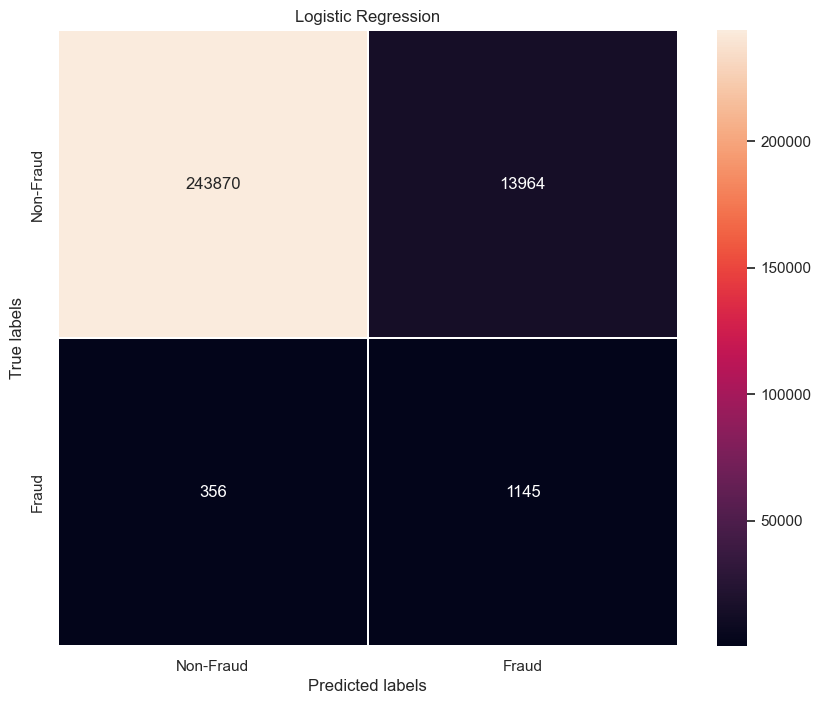

In [79]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, auc, roc_curve

# plotting a confusion matrix 
confus_matrix_log= confusion_matrix(y_test, y_pred_logreg)

#plt.figure(figsize= (10,8))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_roc_curve

rf = RandomForestClassifier(n_estimators=10, max_depth=5, 
                             min_samples_leaf=100, random_state=100, oob_score=True)



rf.fit(X_train_Smote, y_train_Smote)

RandomForestClassifier(max_depth=5, min_samples_leaf=100, n_estimators=10,
                       oob_score=True, random_state=100)

In [81]:
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf, average="weighted")
print("Accuracy of Baseline Model (Logistic Regression):", accuracy_1)
print("F1 score of Baseline Model (Logistic Regression):", f1_score_1)

Accuracy of Baseline Model (Logistic Regression): 0.9447818458750266
F1 score of Baseline Model (Logistic Regression): 0.9666526847338547


In [82]:
report_lr = classification_report(y_test, y_pred_rf)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    257834
           1       0.05      0.87      0.10      1501

    accuracy                           0.91    259335
   macro avg       0.53      0.89      0.53    259335
weighted avg       0.99      0.91      0.95    259335



The above metrics show that although the Random Forest model has a slightly lower recall, it has much better accuracy and precision!

In [83]:
# Training accuracy score
print('Train:', rf.score(X_train_Smote, y_train_Smote))
print()
print('Test:', rf.score(X_test, y_test))

Train: 0.8862154392122831

Test: 0.9085622843040855


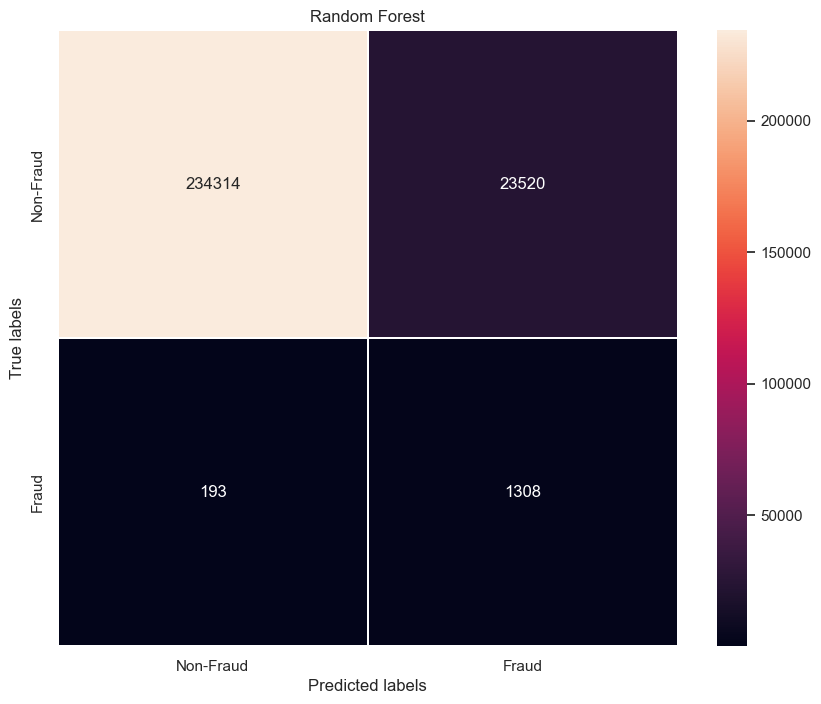

In [84]:
# plotting a confusion matrix 
confus_matrix_log= confusion_matrix(y_test, y_pred_rf)

#plt.figure(figsize= (10,8))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
decision_tree = DecisionTreeClassifier(random_state = 42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict the classes on the test data
y_pred_decision_tree = decision_tree.predict(X_test)

In [86]:
report_lr = classification_report(y_test, y_pred_decision_tree)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.82      0.83      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.91      0.91      0.91    259335
weighted avg       1.00      1.00      1.00    259335



In [87]:
# Training and test accuracy score
print('Train:', decision_tree.score(X_train_Smote, y_train_Smote))
print()
print('Test:', decision_tree.score(X_test, y_test))

Train: 0.8845884218028089

Test: 0.99795631133476


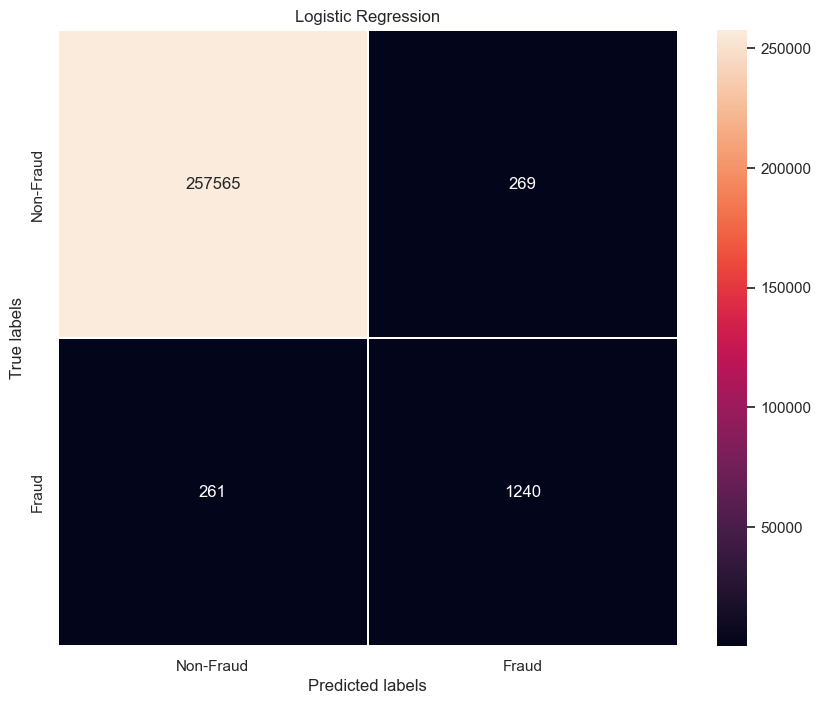

In [88]:
# plotting a confusion matrix 

confus_matrix_log= confusion_matrix(y_test, y_pred_decision_tree)

#plt.figure(figsize= (10,8))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

##  K Nearest Neighbors

In [89]:
# Instantiate the classifier model with n-neighbours of 3
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train_Smote, y_train_Smote)

KNeighborsClassifier(n_neighbors=3)

In [90]:
y_pred_knn = knn.predict(X_test)

In [91]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn, average="weighted")
print("Accuracy of Baseline Model (Logistic Regression):", accuracy_1)
print("F1 score of Baseline Model (Logistic Regression):", f1_score_1)

Accuracy of Baseline Model (Logistic Regression): 0.9447818458750266
F1 score of Baseline Model (Logistic Regression): 0.9666526847338547


In [92]:
report_lr = classification_report(y_test, y_pred_knn)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257834
           1       0.35      0.64      0.45      1501

    accuracy                           0.99    259335
   macro avg       0.67      0.82      0.72    259335
weighted avg       0.99      0.99      0.99    259335



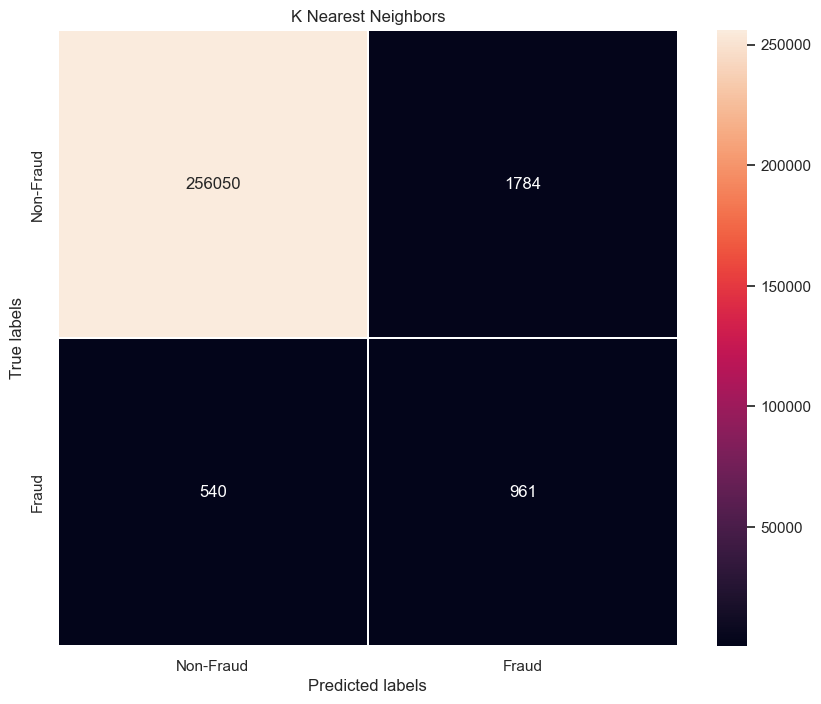

In [93]:
confus_matrix_log= confusion_matrix(y_test, y_pred_knn)

#plt.figure(figsize= (10,8))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('K Nearest Neighbors'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [ ]:
# Training accuracy score
print('Train:', knn.score(X_train_Smote, y_train_Smote))
print()
print('Test:', knn.score(X_test, y_test))

To evaluate fraud detection models, the concepts of sensitivty/recall and precision are very important. Recall is True Positives/(True Positives + False Negatives), which meaures how many fraud cases fly under the radar while precision (True Positives/(True Positives + False Positives)) evaluates how good the model is at generating as fewer false alarms as possible. For fraud detection, we want to prioritize high recall to leave out as few fraud cases as possible while also having a relatively high precision because too many false alarms can also be a problem!

### Prediction with test dataset

In [ ]:
# Create the predictions for the test dataset
test_predictions = knn.predict(test_features_processed)


In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"id": credits_test_df["Credit Card Number"], "Is Fraud": test_predictions})

In [ ]:
# Check the shape of the submission dataframe
submission.shape

In [ ]:
submission['Is Fraud'] = submission['Is Fraud'].replace({0: 'no fraud', 1: 'fraud'})


In [ ]:
# Show the sample head
submission

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






### Conclusions   
- After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.
- The K-Nearest Neighbors Classifier tuned with Grid Search with the best parameter being the Euclidean Distance (p=2) outperforms its counterparts to give a test accuracy of nearly 99.8% and a perfect F1-Score with minimal overfitting  
- The number of fraud transactions are very few compared to legitimate transactions and it has to be balanced in order for a fair comparison to prevent the model from overfitting.
- SMOTE overcomes overfitting by synthetically oversampling minority class labels and is successful to a great degree.  

### Recommendations  
 
- For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.
- For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.
- For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent.
- So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.



## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.
- If you have any comments, suggestions or feedback about this project, please feel free to share them. We are open to criticism and welcome any suggestions that can help us improve our skills and future projects.


### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?